<a href="https://colab.research.google.com/github/ricardopaivamelo/Cap_1_despertar_da_rede_neural_entrega_1/blob/main/RicardoPaiva_rm565522_pbl_fase6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# =================================================================
# PROJETO: Detecção de Objetos com YOLO - FarmTech Solutions
# =================================================================

# ----------------------------------------------------------------------------
# ETAPA 1: CONFIGURAÇÃO INICIAL E MONTAGEM DO GOOGLE DRIVE
# ----------------------------------------------------------------------------

## 📋 Etapa 1: Configuração Inicial

Nesta etapa vamos:
1. Montar o Google Drive para acessar nosso dataset
2. Instalar as dependências necessárias
3. Clonar o repositório YOLOv5

In [2]:
#  Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

print("✅ Google Drive montado com sucesso!")

Mounted at /content/drive
✅ Google Drive montado com sucesso!


# ----------------------------------------------------------------------------
# ETAPA 2: INSTALAÇÃO DO YOLOV5
# ----------------------------------------------------------------------------


## 🔧 Etapa 2: Instalação do YOLOv5

O YOLOv5 é um modelo de detecção de objetos em tempo real.
Vamos clonar o repositório oficial e instalar as dependências.

In [3]:
# Clonar o repositório YOLOv5
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

# Instalar dependências
!pip install -r requirements.txt

print("✅ YOLOv5 instalado com sucesso!")

Cloning into 'yolov5'...
remote: Enumerating objects: 17608, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 17608 (delta 7), reused 2 (delta 2), pack-reused 17593 (from 2)
Receiving objects: 100% (17608/17608), 16.84 MiB | 28.64 MiB/s, done.
Resolving deltas: 100% (11991/11991), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.7 MB/s eta 0:00:00
✅ YOLOv5 instalado com sucesso!


# ----------------------------------------------------------------------------
# ETAPA 3: PREPARAÇÃO DO DATASET
# ----------------------------------------------------------------------------


## 📁 Etapa 3: Preparação do Dataset

### Estrutura esperada do dataset:

```
/content/drive/MyDrive/seu_dataset/
├── data.yaml          # Arquivo de configuração
├── train/
│   ├── images/        # Imagens de treino
│   └── labels/        # Anotações de treino (.txt)
├── valid/
│   ├── images/        # Imagens de validação
│   └── labels/        # Anotações de validação (.txt)
└── test/
    ├── images/        # Imagens de teste
    └── labels/        # Anotações de teste (.txt)
```


In [6]:
# CONFIGURAÇÃO DO CAMINHO DO DATASET
DATASET_PATH = "/content/drive/MyDrive/ProjetoYOLO/dataset"
DATA_YAML = "/content/drive/MyDrive/ProjetoYOLO/custom_dataset.yaml"

# Verificar se o dataset existe
import os
if os.path.exists(DATASET_PATH):
    print(f"✅ Dataset encontrado em: {DATASET_PATH}")
else:
    print(f"❌ ERRO: Dataset não encontrado em: {DATASET_PATH}")
    print("⚠️  Por favor, verifique o caminho do seu dataset!")

✅ Dataset encontrado em: /content/drive/MyDrive/ProjetoYOLO/dataset


# ----------------------------------------------------------------------------
# EXEMPLO DE ARQUIVO data.yaml
# ----------------------------------------------------------------------------


### Exemplo de arquivo data.yaml:

```yaml
# Caminhos
train: /content/drive/MyDrive/ProjetoYOLO/dataset/train/images
val: /content/drive/MyDrive/ProjetoYOLO/dataset/valid/images
test: /content/drive/MyDrive/ProjetoYOLO/dataset/test/images

# Classes
nc: 2  # número de classes
names: ['Coffee', 'Mountains']  # nomes das classes
```

**Certifique-se de que seu arquivo data.yaml está configurado corretamente!**

In [7]:
# Visualizar o conteúdo do data.yaml
print("\n📄 Conteúdo do arquivo data.yaml:")
print("-" * 50)
!cat {DATA_YAML}


📄 Conteúdo do arquivo data.yaml:
--------------------------------------------------
path: /content/drive/MyDrive/ProjetoYOLO
train: /content/drive/MyDrive/ProjetoYOLO/dataset/train
val: /content/drive/MyDrive/ProjetoYOLO/dataset/val
test: /content/drive/MyDrive/ProjetoYOLO/dataset/test
names:
  0: Coffee
  1: Mountains


# ----------------------------------------------------------------------------
# ETAPA 4: VISUALIZAÇÃO DO DATASET
# ----------------------------------------------------------------------------

## 👁️ Etapa 4: Visualização do Dataset

Vamos visualizar algumas imagens do dataset para garantir que está tudo correto


🖼️ Amostras do conjunto de TREINO:


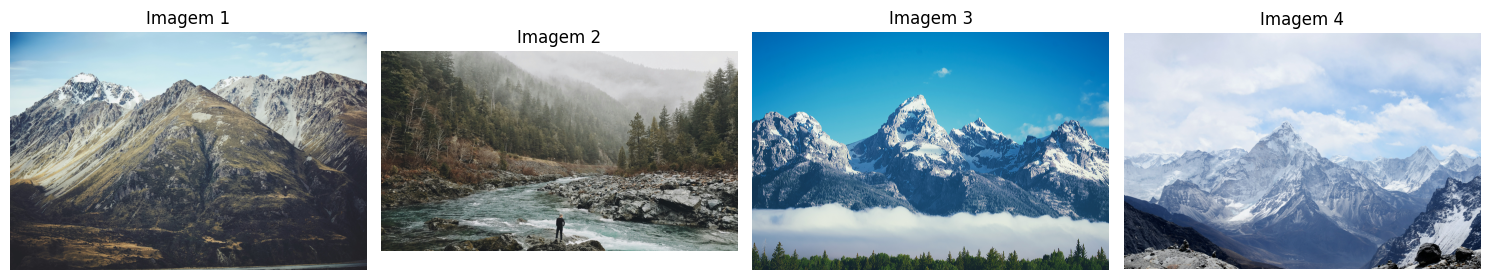

✅ Exibindo 4 de 64 imagens


In [8]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import glob

def visualizar_amostras(pasta_imagens, num_amostras=4):
    """Visualiza algumas imagens do dataset"""
    imagens = glob.glob(f"{pasta_imagens}/*.jpg") + glob.glob(f"{pasta_imagens}/*.png")

    if len(imagens) == 0:
        print(f"❌ Nenhuma imagem encontrada em {pasta_imagens}")
        return

    num_amostras = min(num_amostras, len(imagens))

    fig, axes = plt.subplots(1, num_amostras, figsize=(15, 4))
    if num_amostras == 1:
        axes = [axes]

    for i, img_path in enumerate(imagens[:num_amostras]):
        img = Image.open(img_path)
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f"Imagem {i+1}")

    plt.tight_layout()
    plt.show()
    print(f"✅ Exibindo {num_amostras} de {len(imagens)} imagens")

# Visualizar imagens de treino
print("\n🖼️ Amostras do conjunto de TREINO:")
visualizar_amostras("/content/drive/MyDrive/ProjetoYOLO/dataset/train/images")

# ----------------------------------------------------------------------------
# ETAPA 5: TREINAMENTO - PRIMEIRA SIMULAÇÃO (30 ÉPOCAS)
# ----------------------------------------------------------------------------

## 🎯 Etapa 5: Primeira Simulação - Treinamento com 30 Épocas

### Parâmetros do treinamento:
- **img**: Tamanho da imagem (640x640 pixels)
- **batch**: Tamanho do lote (16 imagens por vez)
- **epochs**: Número de épocas (30)
- **data**: Caminho para o arquivo de configuração
- **weights**: Pesos pré-treinados (yolov5s.pt - modelo pequeno)
- **name**: Nome do experimento

### O que acontece durante o treinamento?
1. O modelo aprende a identificar padrões nas imagens
2. A cada época, ele ajusta seus pesos para melhorar a detecção
3. Métricas são calculadas: precisão, recall, mAP

In [11]:
# TREINAMENTO 1: 30 ÉPOCAS
!python train.py \
    --img 640 \
    --batch 16 \
    --epochs 30 \
    --data {DATA_YAML} \
    --weights yolov5s.pt \
    --name exp_30_epochs \
    --cache

print("\n✅ Treinamento de 30 épocas concluído!")
print("📊 Resultados salvos em: yolov5/runs/train/exp_30_epochs")

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-10-14 21:00:42.418617: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760475642.439235    7192 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760475642.445410    7192 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1760475642.461160    7192 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1760475642.461190    7192 computation_placer.cc:177] computation placer already registere

# ----------------------------------------------------------------------------
# ETAPA 6: ANÁLISE DOS RESULTADOS - 30 ÉPOCAS
# ----------------------------------------------------------------------------

## 📊 Etapa 6: Análise dos Resultados - 30 Épocas

Vamos visualizar as métricas e gráficos gerados pelo treinamento.

📈 Gráficos de Treinamento - 30 Épocas:
--------------------------------------------------


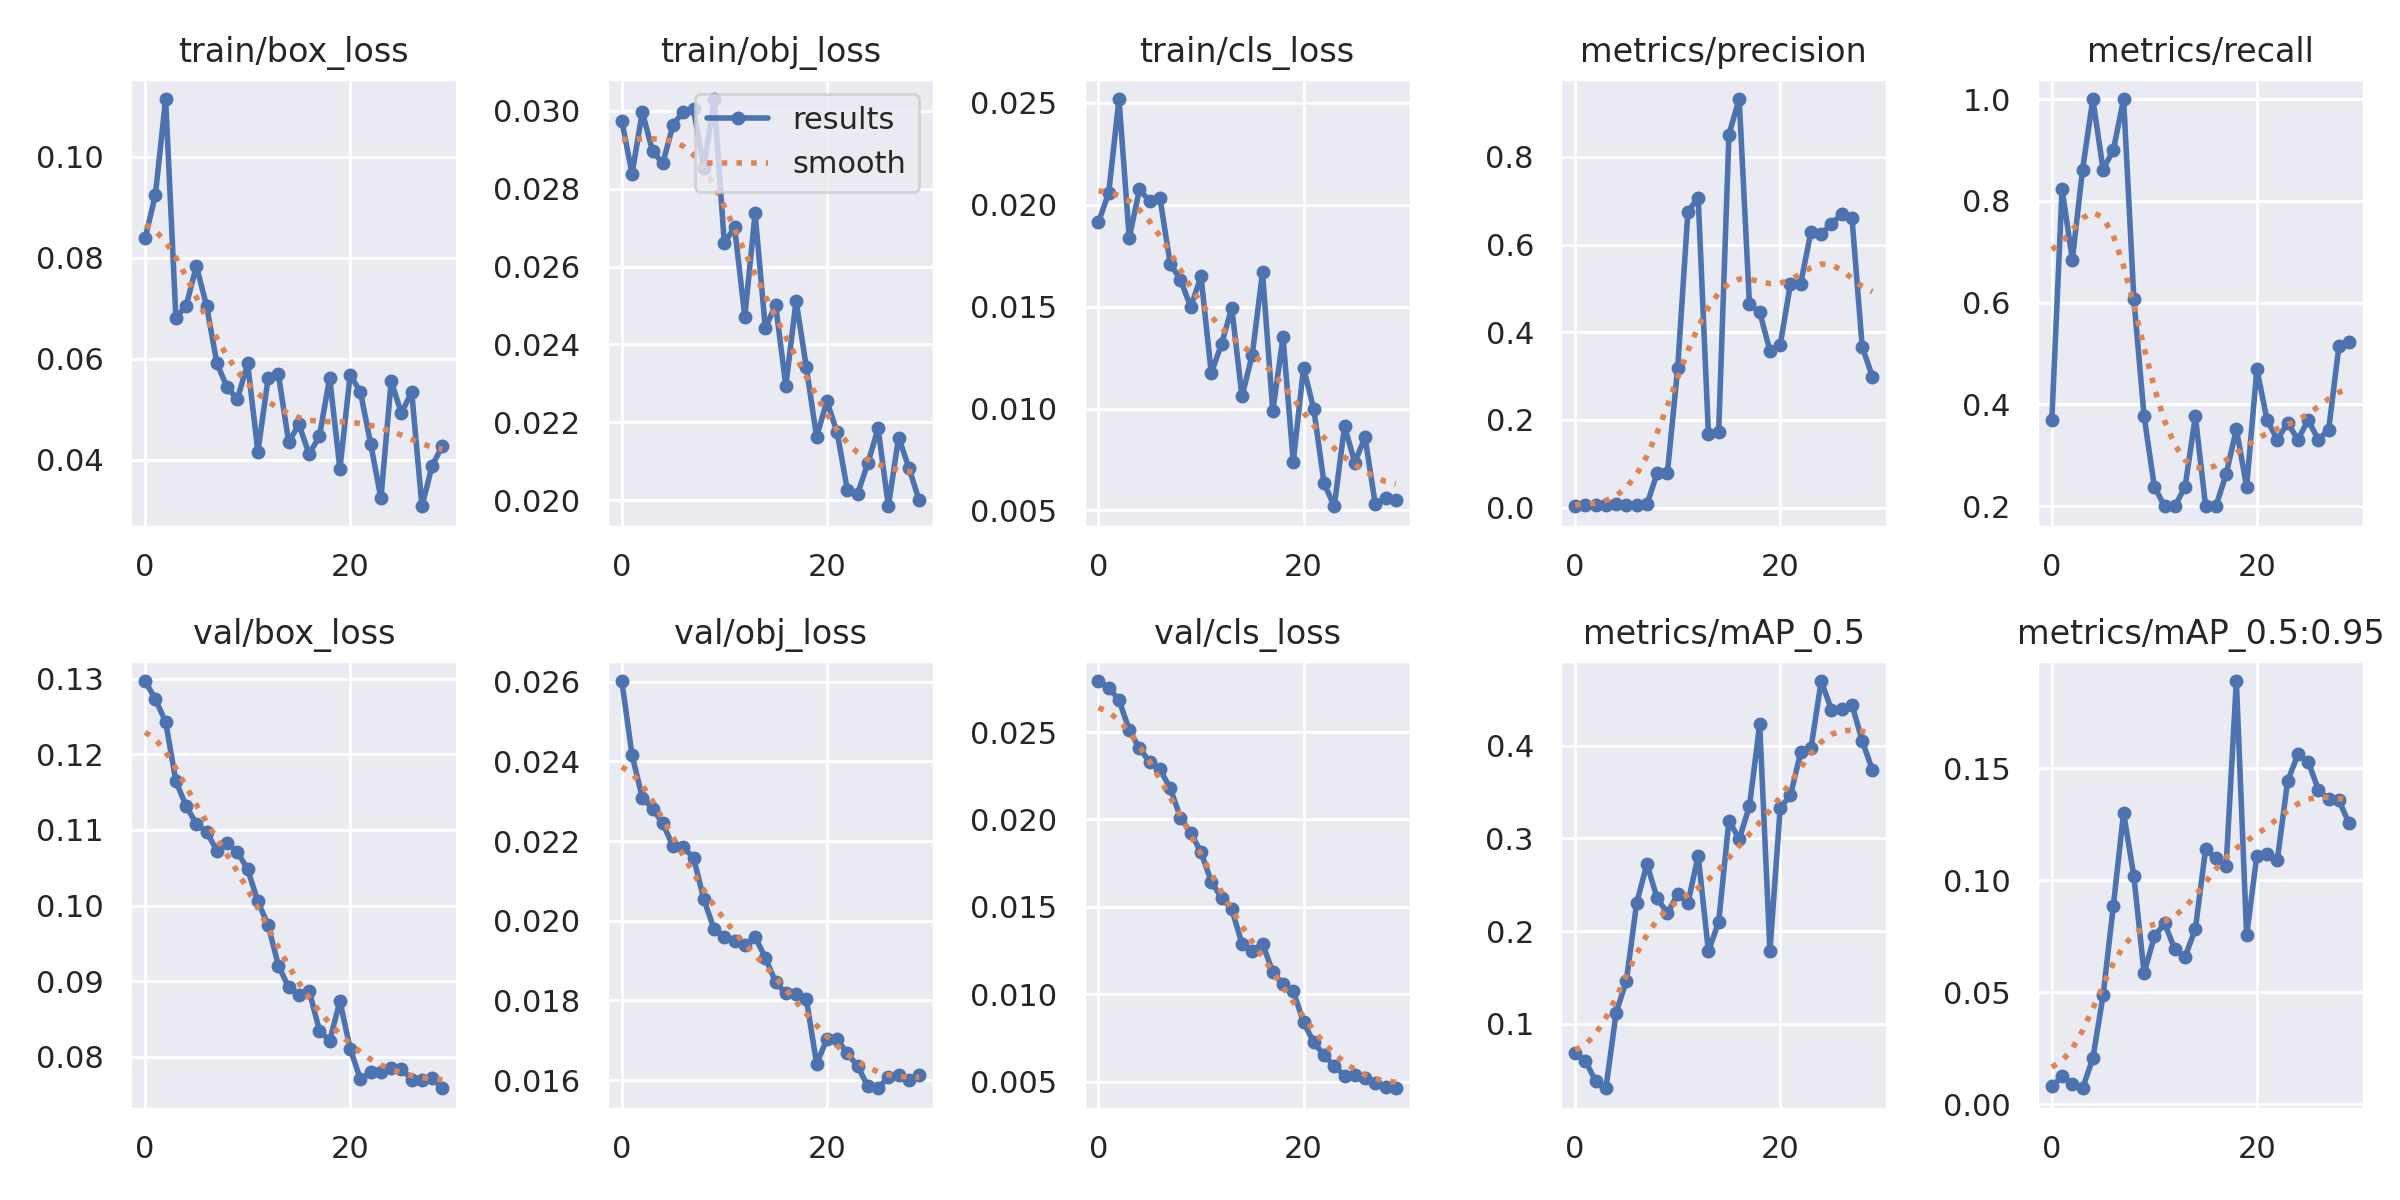


🎯 Matriz de Confusão - 30 Épocas:


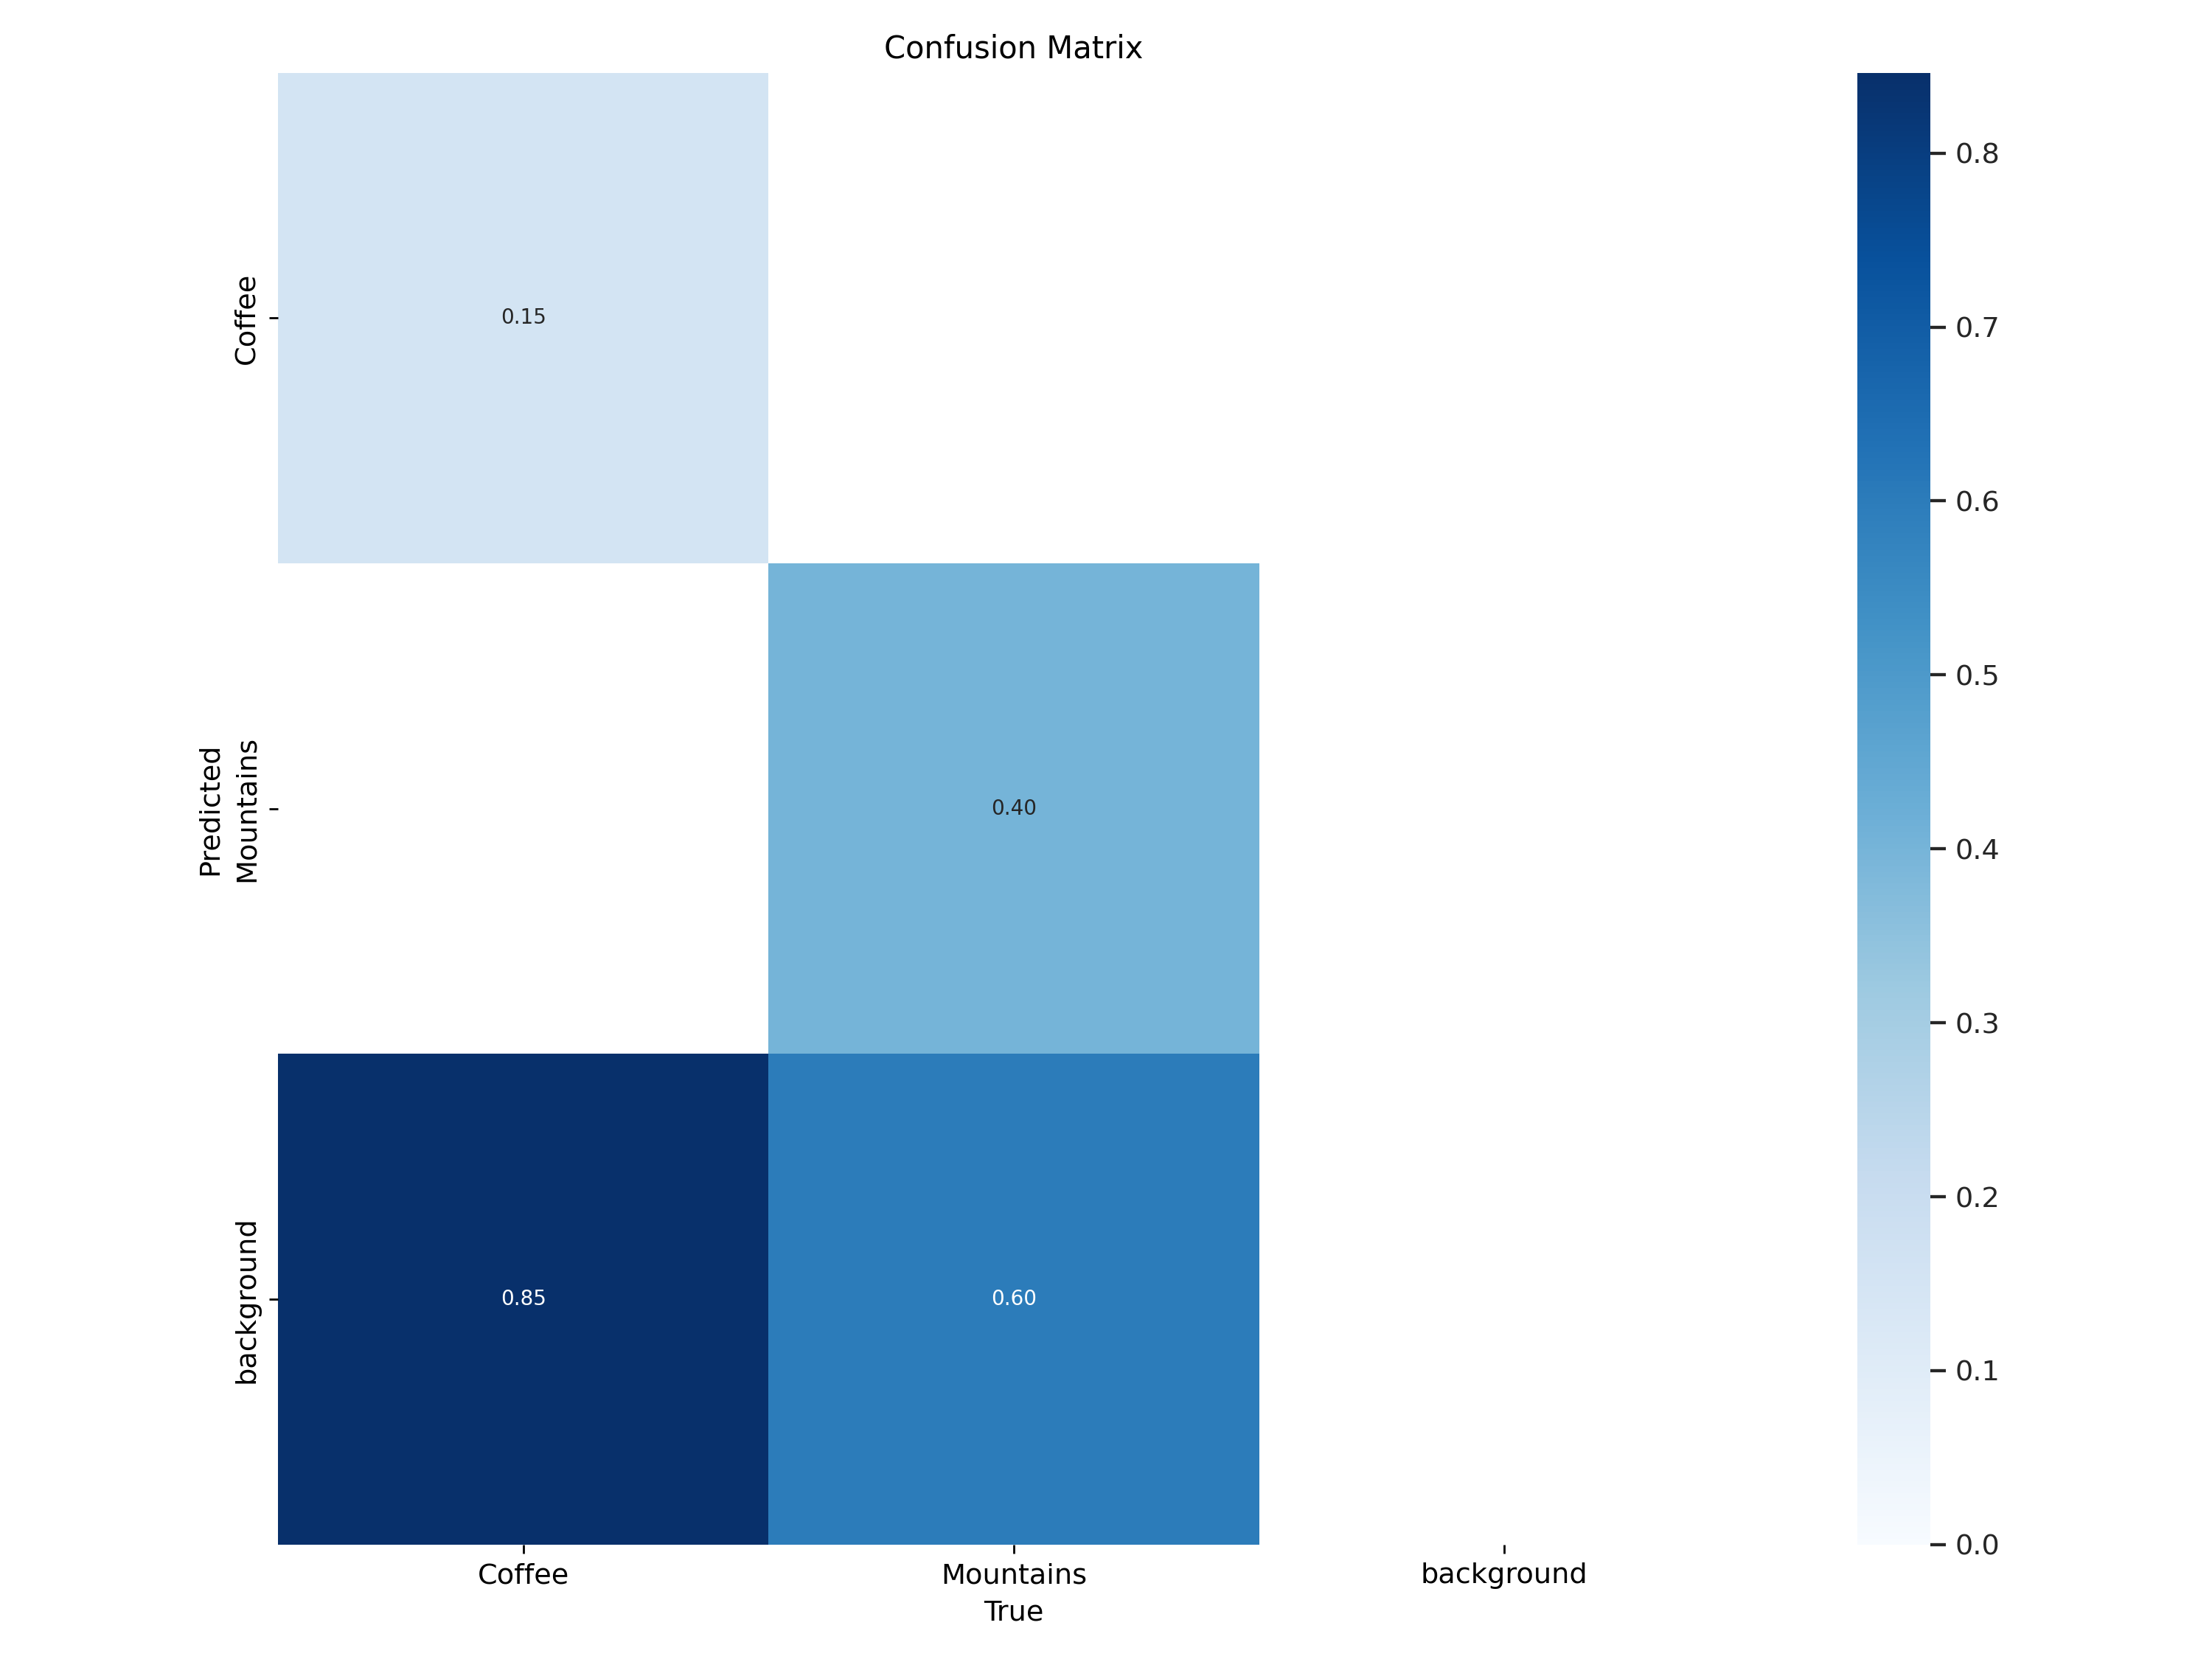


🖼️ Exemplos de Predições - 30 Épocas:


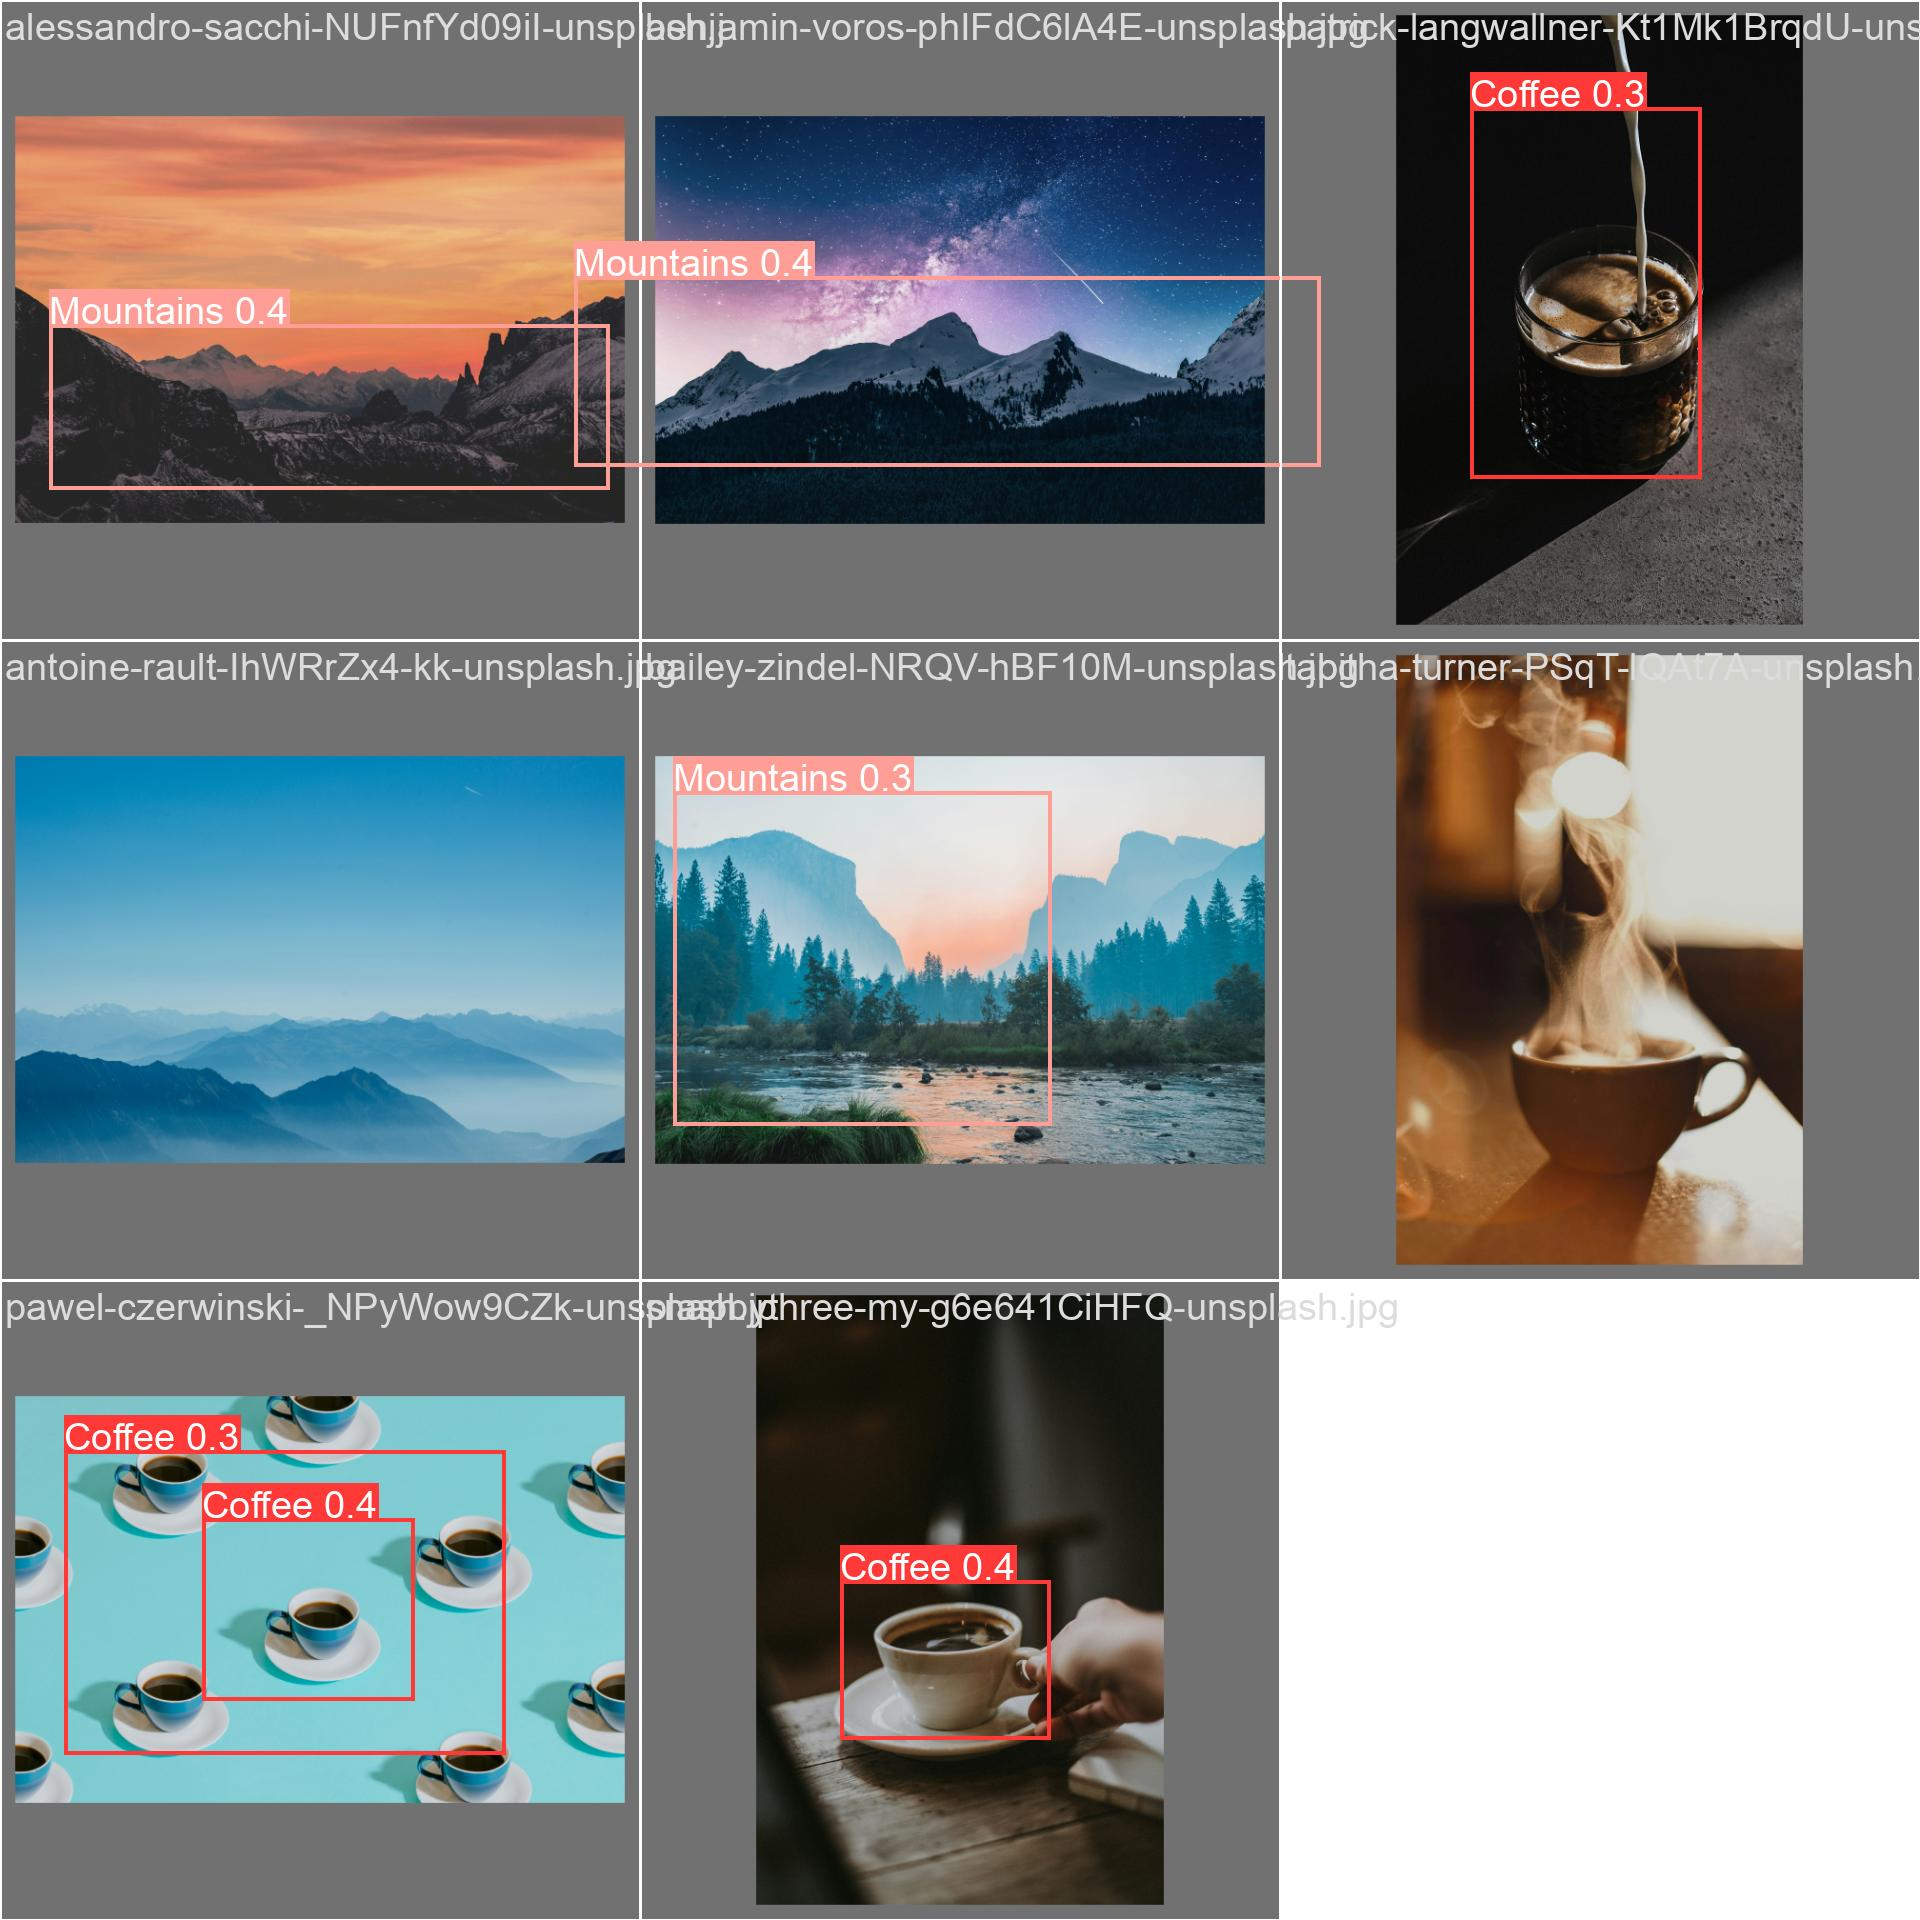

In [12]:
from IPython.display import Image as IPImage, display

# Caminho dos resultados
RESULTS_30 = "/content/yolov5/runs/train/exp_30_epochs2"

print("📈 Gráficos de Treinamento - 30 Épocas:")
print("-" * 50)

# Exibir gráfico de resultados
display(IPImage(filename=f"{RESULTS_30}/results.png"))

print("\n🎯 Matriz de Confusão - 30 Épocas:")
display(IPImage(filename=f"{RESULTS_30}/confusion_matrix.png"))

# Exibir exemplos de predições
print("\n🖼️ Exemplos de Predições - 30 Épocas:")
display(IPImage(filename=f"{RESULTS_30}/val_batch0_pred.jpg"))

# ----------------------------------------------------------------------------
# ETAPA 7: VALIDAÇÃO - 30 ÉPOCAS
# ----------------------------------------------------------------------------

## ✅ Etapa 7: Validação do Modelo - 30 Épocas

A validação testa o modelo em dados que ele não viu durante o treinamento.

In [13]:
!python val.py \
    --weights {RESULTS_30}/weights/best.pt \
    --data {DATA_YAML} \
    --img 640 \
    --task val \
    --name val_30_epochs

print("\n✅ Validação de 30 épocas concluída!")

val: data=/content/drive/MyDrive/ProjetoYOLO/custom_dataset.yaml, weights=['/content/yolov5/runs/train/exp_30_epochs2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=val_30_epochs, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-440-gf5ebc52c Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/drive/MyDrive/ProjetoYOLO/dataset/val/labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100% 8/8 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:04<00:00,  4.69s/it]
                   all          8         18      0.446      0.353      0.423      0.189
                Coffee          8   

# ----------------------------------------------------------------------------
# ETAPA 8: TREINAMENTO - SEGUNDA SIMULAÇÃO (60 ÉPOCAS)
# ----------------------------------------------------------------------------

## 🎯 Etapa 8: Segunda Simulação - Treinamento com 60 Épocas

Agora vamos treinar com o dobro de épocas para comparar os resultados.
**Expectativa**: Maior acurácia, mas risco de overfitting.

In [14]:
# TREINAMENTO 2: 60 ÉPOCAS
!python train.py \
    --img 640 \
    --batch 16 \
    --epochs 60 \
    --data {DATA_YAML} \
    --weights yolov5s.pt \
    --name exp_60_epochs \
    --cache

print("\n✅ Treinamento de 60 épocas concluído!")
print("📊 Resultados salvos em: yolov5/runs/train/exp_60_epochs")

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-10-14 21:09:53.327564: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760476193.348479    9634 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760476193.354818    9634 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1760476193.371631    9634 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1760476193.371666    9634 computation_placer.cc:177] computation placer already registere

# ----------------------------------------------------------------------------
# ETAPA 9: ANÁLISE DOS RESULTADOS - 60 ÉPOCAS
# ----------------------------------------------------------------------------

## 📊 Etapa 9: Análise dos Resultados - 60 Épocas

📈 Gráficos de Treinamento - 60 Épocas:
--------------------------------------------------


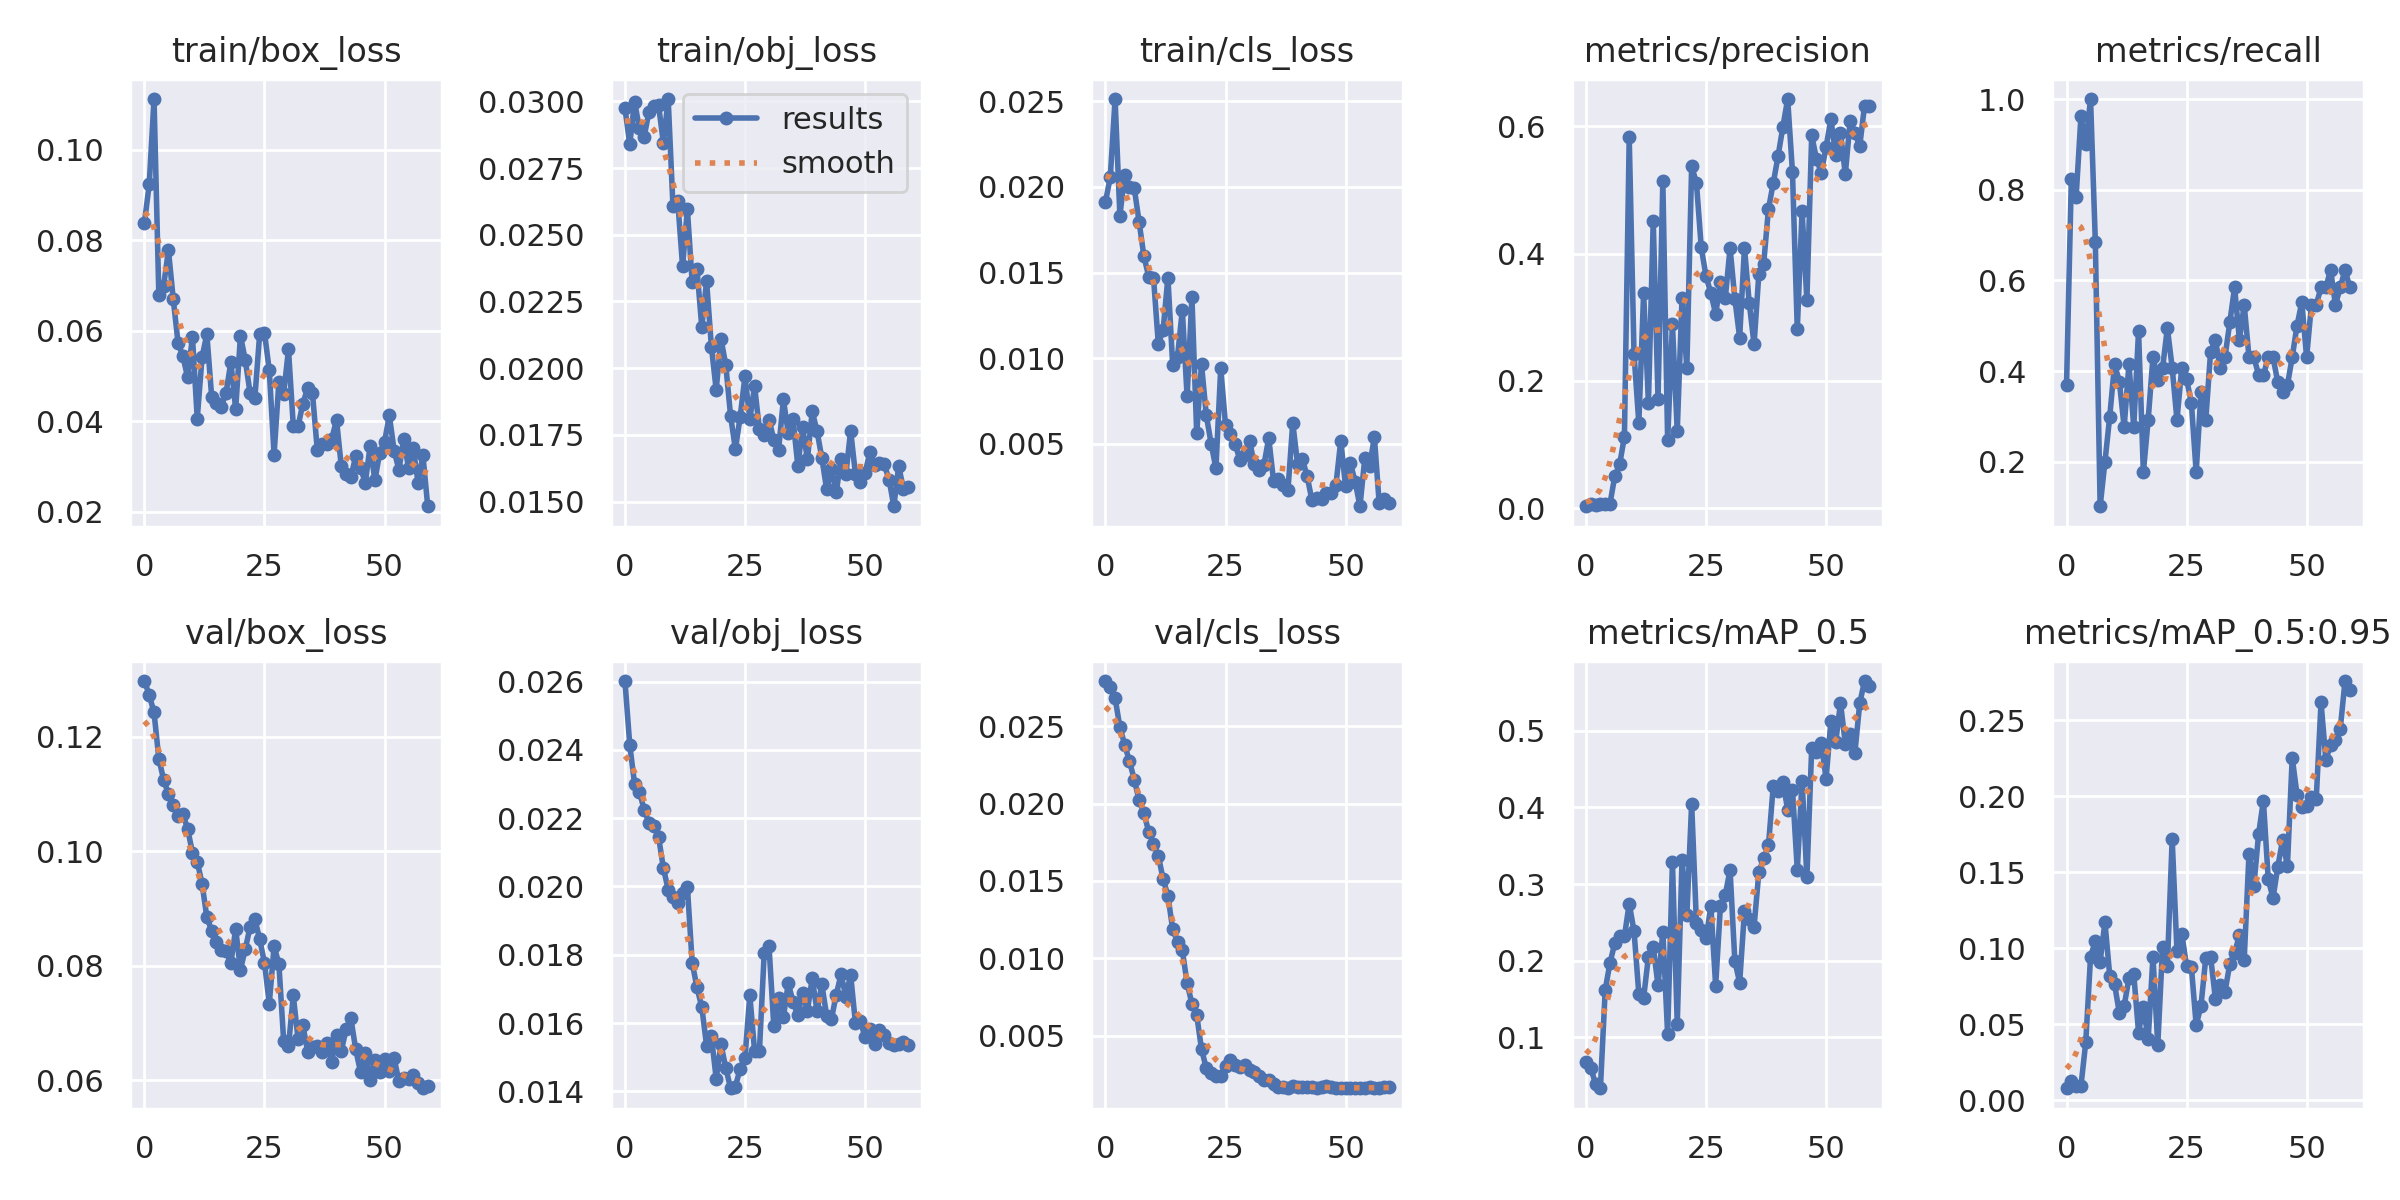


🎯 Matriz de Confusão - 60 Épocas:


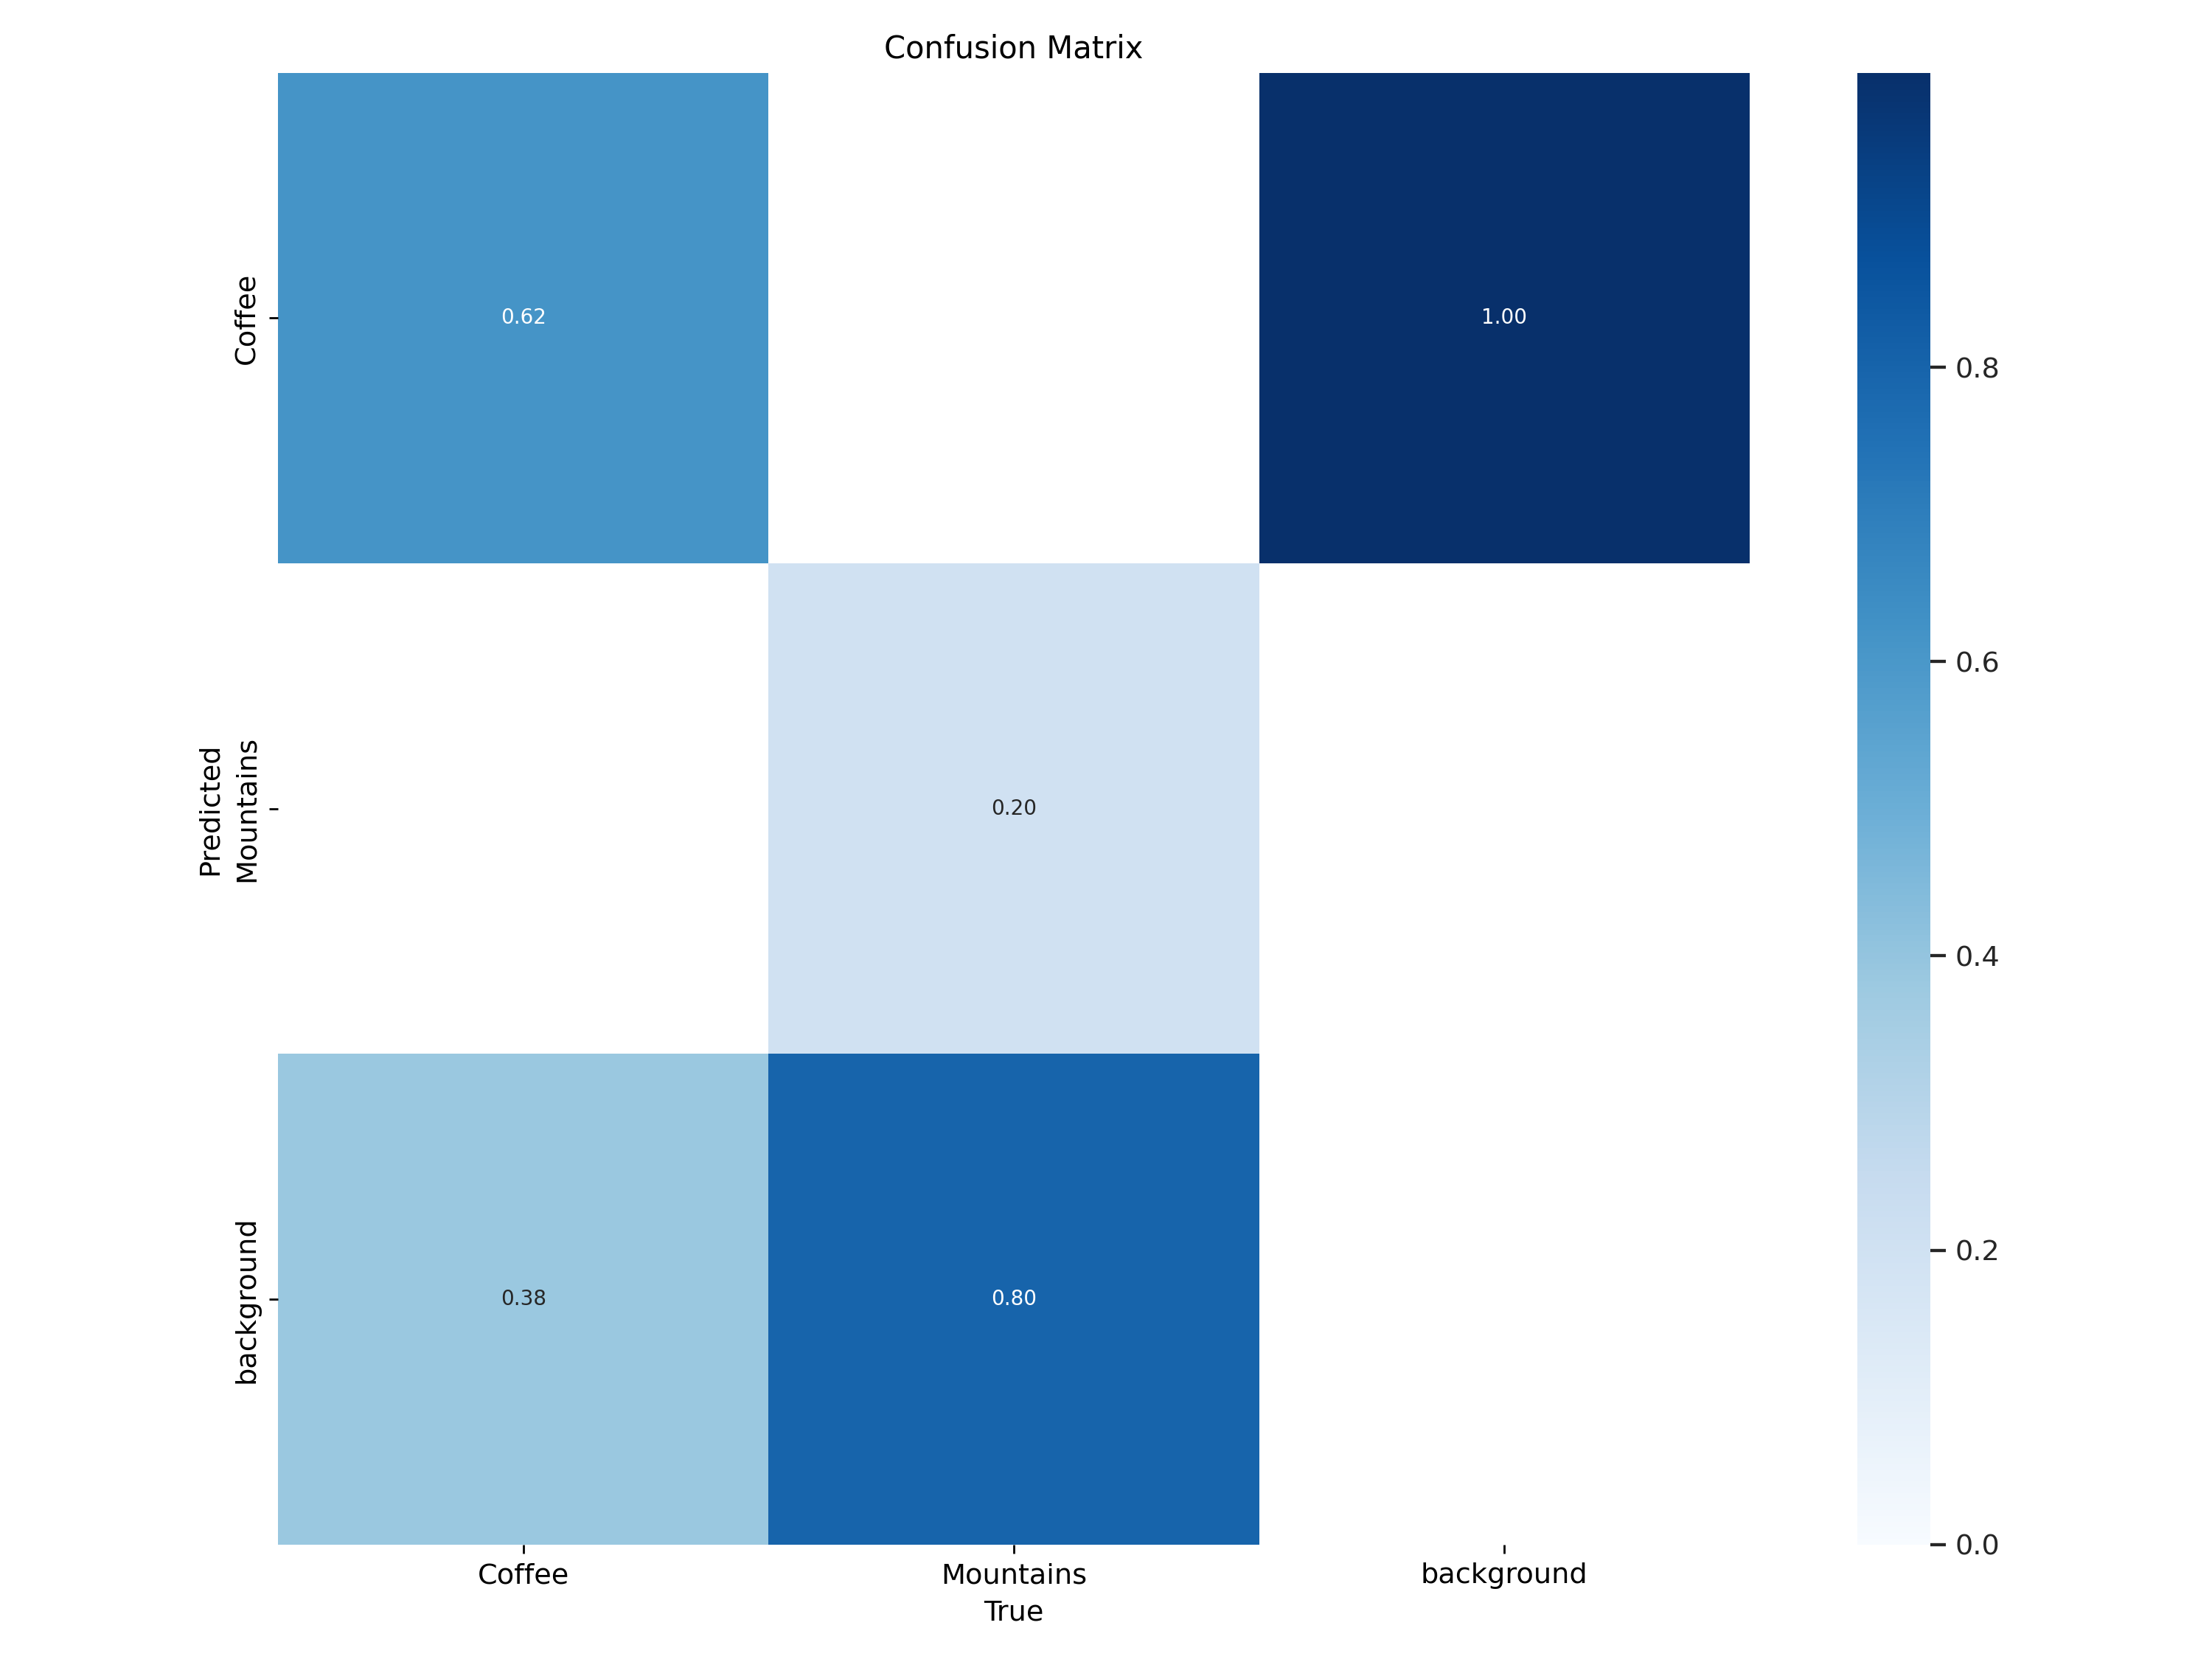


🖼️ Exemplos de Predições - 60 Épocas:


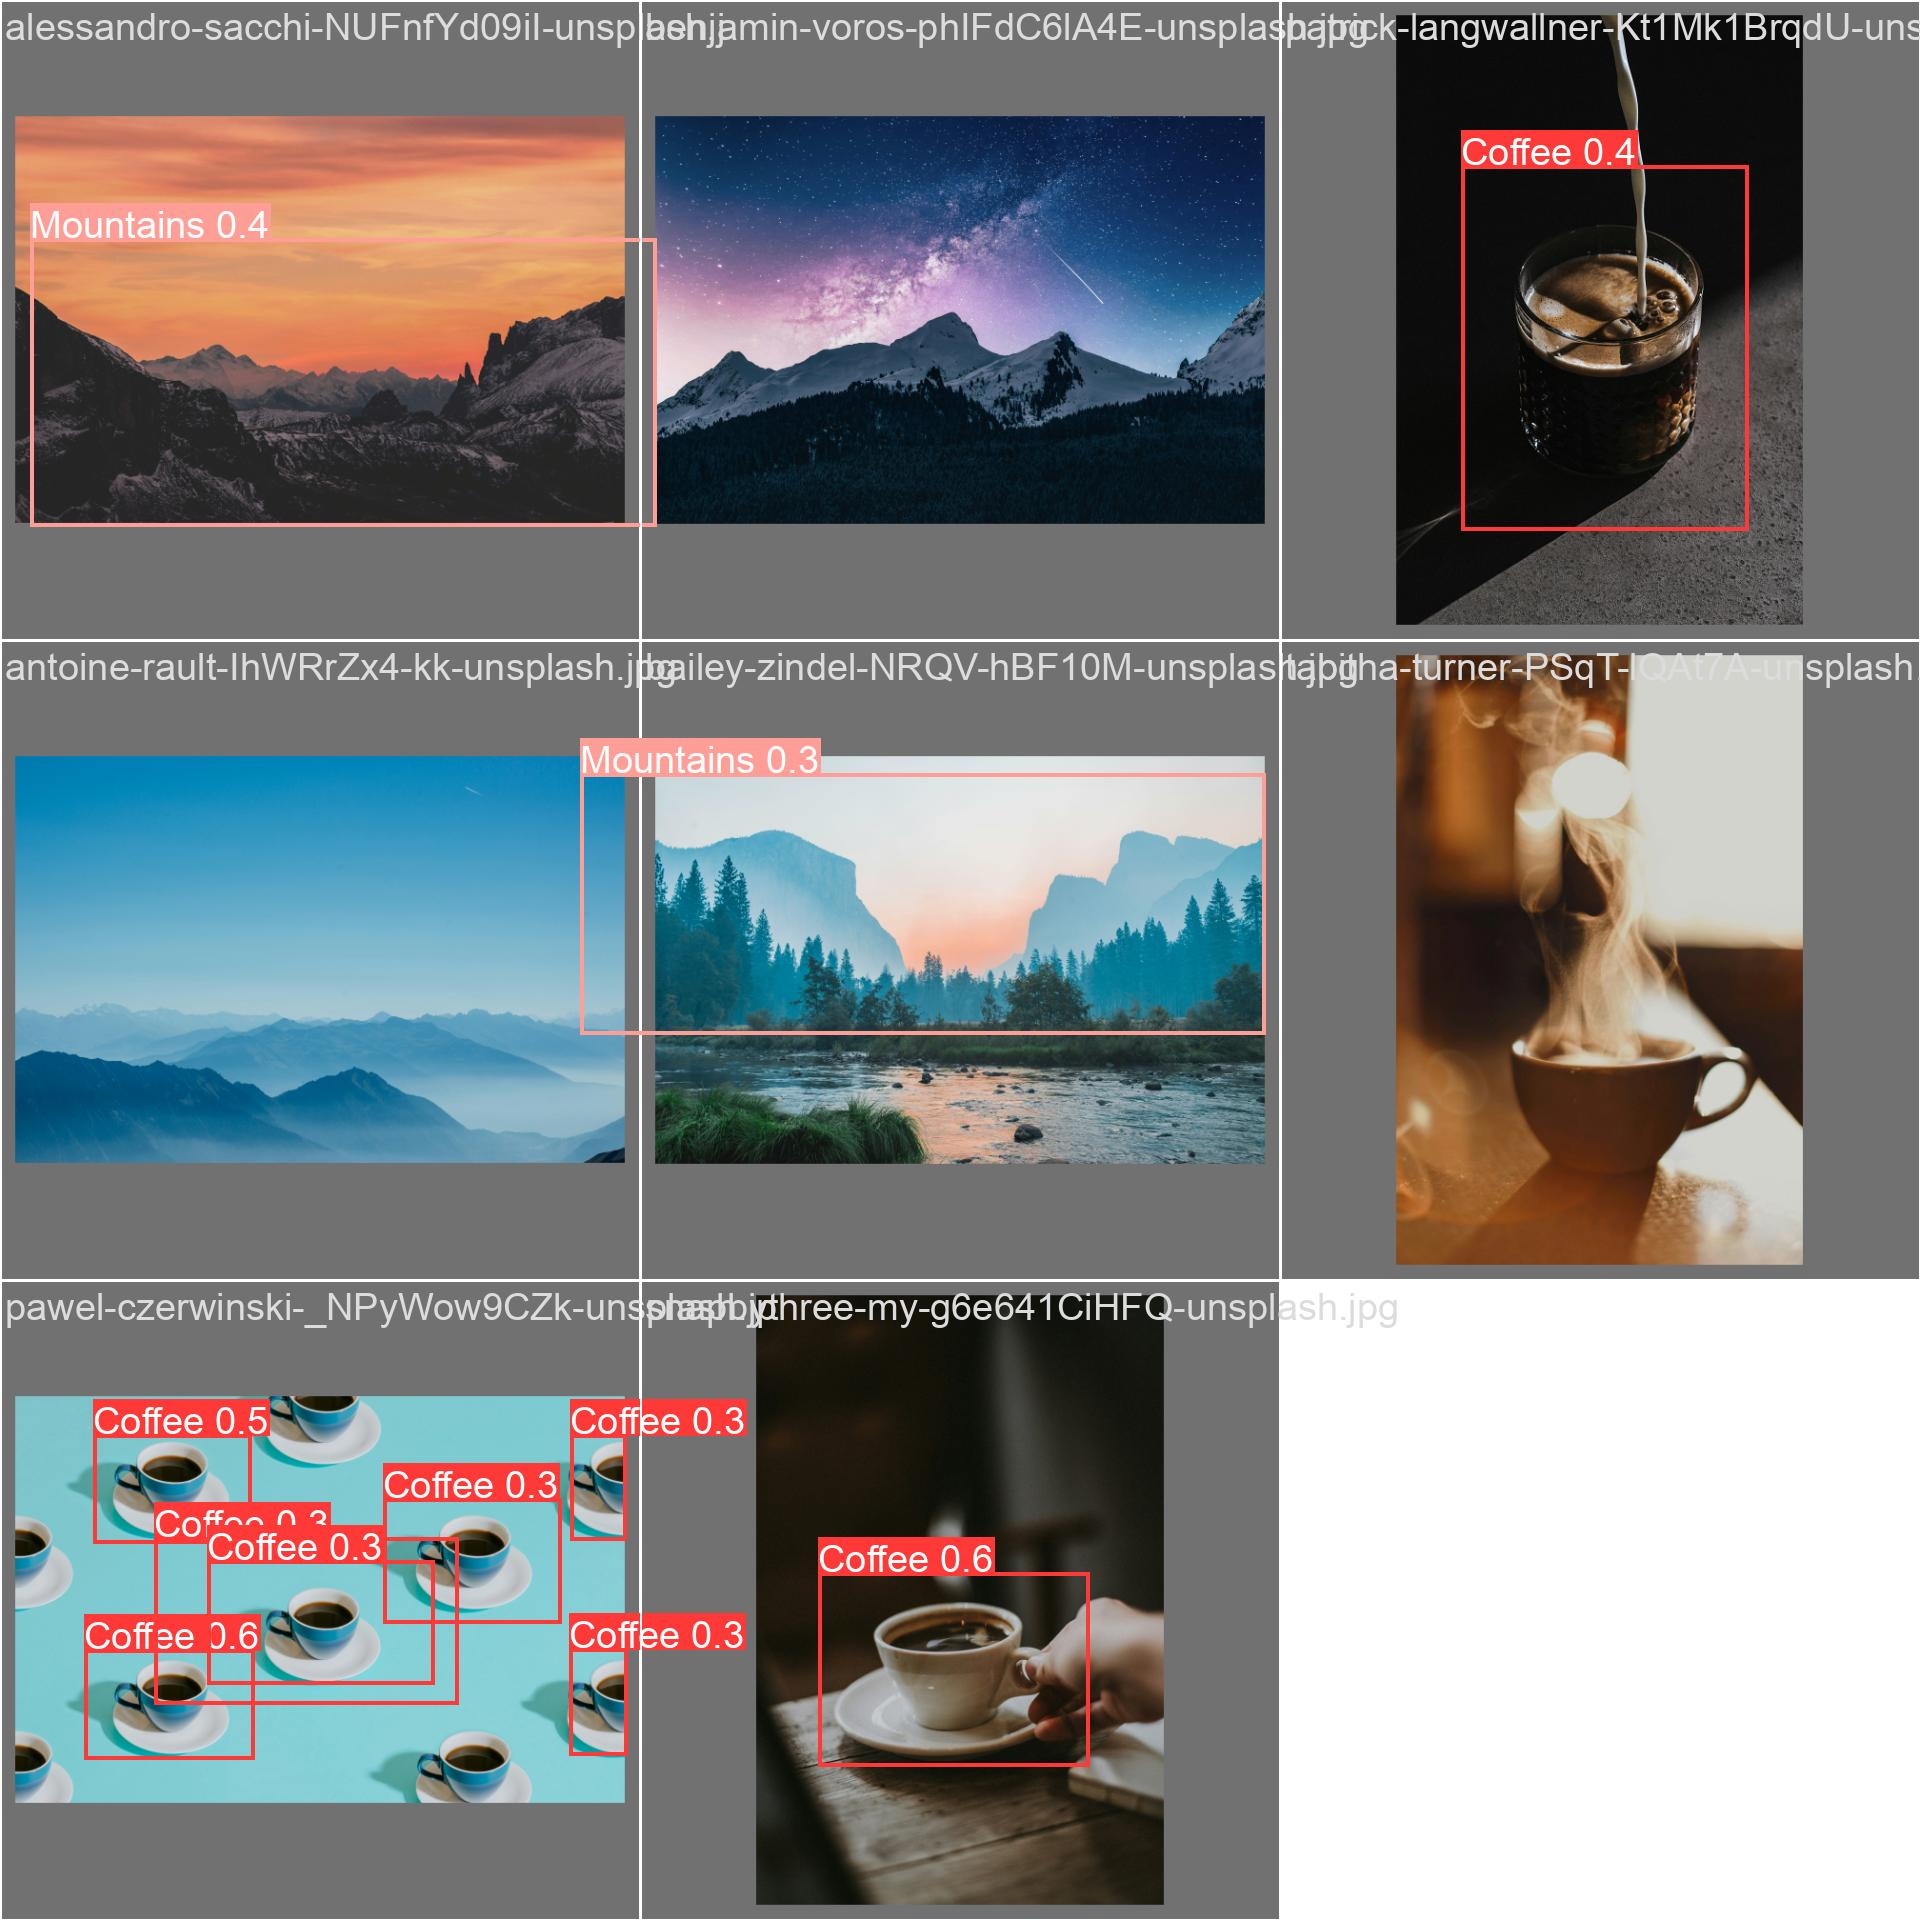

In [15]:
RESULTS_60 = "/content/yolov5/runs/train/exp_60_epochs"

print("📈 Gráficos de Treinamento - 60 Épocas:")
print("-" * 50)

display(IPImage(filename=f"{RESULTS_60}/results.png"))

print("\n🎯 Matriz de Confusão - 60 Épocas:")
display(IPImage(filename=f"{RESULTS_60}/confusion_matrix.png"))

print("\n🖼️ Exemplos de Predições - 60 Épocas:")
display(IPImage(filename=f"{RESULTS_60}/val_batch0_pred.jpg"))

# ----------------------------------------------------------------------------
# ETAPA 10: VALIDAÇÃO - 60 ÉPOCAS
# ----------------------------------------------------------------------------

## ✅ Etapa 10: Validação do Modelo - 60 Épocas

In [16]:
!python val.py \
    --weights {RESULTS_60}/weights/best.pt \
    --data {DATA_YAML} \
    --img 640 \
    --task val \
    --name val_60_epochs

print("\n✅ Validação de 60 épocas concluída!")

val: data=/content/drive/MyDrive/ProjetoYOLO/custom_dataset.yaml, weights=['/content/yolov5/runs/train/exp_60_epochs/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=val_60_epochs, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-440-gf5ebc52c Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/drive/MyDrive/ProjetoYOLO/dataset/val/labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100% 8/8 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:04<00:00,  4.60s/it]
                   all          8         18      0.632      0.623      0.564      0.276
                Coffee          8    

# ----------------------------------------------------------------------------
# ETAPA 11: COMPARAÇÃO DOS RESULTADOS
# ----------------------------------------------------------------------------

## 🔄 Etapa 11: Comparação dos Resultados

Vamos comparar as métricas dos dois treinamentos lado a lado.

📋 Colunas disponíveis no CSV (após limpeza):
['epoch', 'train/box_loss', 'train/obj_loss', 'train/cls_loss', 'metrics/precision', 'metrics/recall', 'metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', 'val/box_loss', 'val/obj_loss', 'val/cls_loss', 'x/lr0', 'x/lr1', 'x/lr2']



📊 COMPARAÇÃO DE MÉTRICAS:
             30 Épocas 60 Épocas
Precisão        0.2988    0.6322
Recall          0.5231    0.5846
mAP@0.5         0.3734    0.5579
mAP@0.5:0.95    0.1253    0.2700


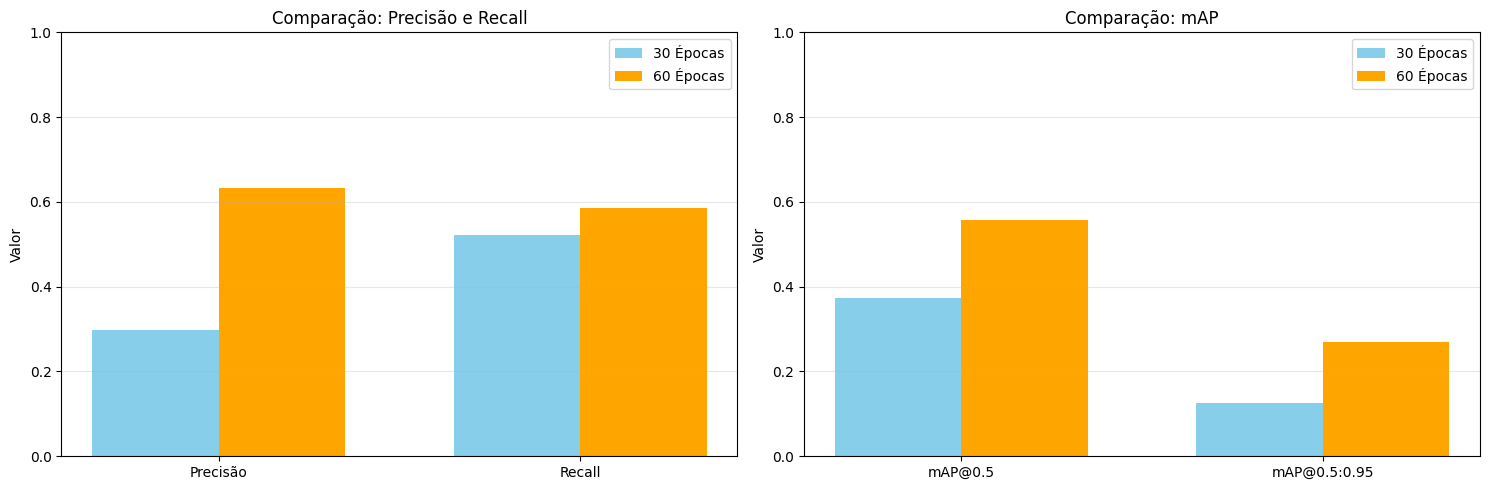


📉 COMPARAÇÃO DE LOSSES:
               30 Épocas 60 Épocas
Train Box Loss  0.042803  0.021246
Train Obj Loss  0.019994  0.015546
Train Cls Loss  0.005497  0.001559
Val Box Loss    0.075847  0.058971
Val Obj Loss    0.016134  0.015370
Val Cls Loss    0.004620  0.001670


In [19]:
import pandas as pd

# Ler resultados do CSV
df_30 = pd.read_csv(f"{RESULTS_30}/results.csv")
df_60 = pd.read_csv(f"{RESULTS_60}/results.csv")

# Remover espaços extras dos nomes das colunas
df_30.columns = df_30.columns.str.strip()
df_60.columns = df_60.columns.str.strip()

print("📋 Colunas disponíveis no CSV (após limpeza):")
print(df_30.columns.tolist())
print("\n")

# Pegar última época de cada treinamento
ultima_30 = df_30.iloc[-1]
ultima_60 = df_60.iloc[-1]

# Criar tabela comparativa com os nomes corretos
comparacao = pd.DataFrame({
    '30 Épocas': [
        f"{ultima_30['metrics/precision']:.4f}",
        f"{ultima_30['metrics/recall']:.4f}",
        f"{ultima_30['metrics/mAP_0.5']:.4f}",
        f"{ultima_30['metrics/mAP_0.5:0.95']:.4f}"
    ],
    '60 Épocas': [
        f"{ultima_60['metrics/precision']:.4f}",
        f"{ultima_60['metrics/recall']:.4f}",
        f"{ultima_60['metrics/mAP_0.5']:.4f}",
        f"{ultima_60['metrics/mAP_0.5:0.95']:.4f}"
    ]
}, index=['Precisão', 'Recall', 'mAP@0.5', 'mAP@0.5:0.95'])

print("\n📊 COMPARAÇÃO DE MÉTRICAS:")
print("=" * 50)
print(comparacao)
print("=" * 50)

# Gráfico comparativo
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico 1: Precisão e Recall
metricas = ['Precisão', 'Recall']
valores_30 = [float(ultima_30['metrics/precision']), float(ultima_30['metrics/recall'])]
valores_60 = [float(ultima_60['metrics/precision']), float(ultima_60['metrics/recall'])]

x = range(len(metricas))
width = 0.35

ax[0].bar([i - width/2 for i in x], valores_30, width, label='30 Épocas', color='skyblue')
ax[0].bar([i + width/2 for i in x], valores_60, width, label='60 Épocas', color='orange')
ax[0].set_ylabel('Valor')
ax[0].set_title('Comparação: Precisão e Recall')
ax[0].set_xticks(x)
ax[0].set_xticklabels(metricas)
ax[0].legend()
ax[0].set_ylim([0, 1])
ax[0].grid(axis='y', alpha=0.3)

# Gráfico 2: mAP
metricas_map = ['mAP@0.5', 'mAP@0.5:0.95']
valores_30_map = [float(ultima_30['metrics/mAP_0.5']), float(ultima_30['metrics/mAP_0.5:0.95'])]
valores_60_map = [float(ultima_60['metrics/mAP_0.5']), float(ultima_60['metrics/mAP_0.5:0.95'])]

x = range(len(metricas_map))

ax[1].bar([i - width/2 for i in x], valores_30_map, width, label='30 Épocas', color='skyblue')
ax[1].bar([i + width/2 for i in x], valores_60_map, width, label='60 Épocas', color='orange')
ax[1].set_ylabel('Valor')
ax[1].set_title('Comparação: mAP')
ax[1].set_xticks(x)
ax[1].set_xticklabels(metricas_map)
ax[1].legend()
ax[1].set_ylim([0, 1])
ax[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Análise adicional de Loss
print("\n📉 COMPARAÇÃO DE LOSSES:")
print("=" * 50)
loss_comparison = pd.DataFrame({
    '30 Épocas': [
        f"{ultima_30['train/box_loss']:.6f}",
        f"{ultima_30['train/obj_loss']:.6f}",
        f"{ultima_30['train/cls_loss']:.6f}",
        f"{ultima_30['val/box_loss']:.6f}",
        f"{ultima_30['val/obj_loss']:.6f}",
        f"{ultima_30['val/cls_loss']:.6f}"
    ],
    '60 Épocas': [
        f"{ultima_60['train/box_loss']:.6f}",
        f"{ultima_60['train/obj_loss']:.6f}",
        f"{ultima_60['train/cls_loss']:.6f}",
        f"{ultima_60['val/box_loss']:.6f}",
        f"{ultima_60['val/obj_loss']:.6f}",
        f"{ultima_60['val/cls_loss']:.6f}"
    ]
}, index=['Train Box Loss', 'Train Obj Loss', 'Train Cls Loss',
          'Val Box Loss', 'Val Obj Loss', 'Val Cls Loss'])
print(loss_comparison)
print("=" * 50)

# ----------------------------------------------------------------------------
# ETAPA 12: TESTE COM IMAGENS NOVAS
# ----------------------------------------------------------------------------

## 🧪 Etapa 12: Teste com Imagens do Conjunto de Teste

Agora vamos testar os modelos em imagens que não foram usadas no treinamento.

In [20]:
# Detectar com o modelo de 30 épocas
!python detect.py \
    --weights {RESULTS_30}/weights/best.pt \
    --source {DATASET_PATH}/test/images \
    --img 640 \
    --conf 0.25 \
    --name test_30_epochs

print("\n✅ Teste com modelo de 30 épocas concluído!")

# Detectar com o modelo de 60 épocas
!python detect.py \
    --weights {RESULTS_60}/weights/best.pt \
    --source {DATASET_PATH}/test/images \
    --img 640 \
    --conf 0.25 \
    --name test_60_epochs

print("\n✅ Teste com modelo de 60 épocas concluído!")

detect: weights=['/content/yolov5/runs/train/exp_30_epochs2/weights/best.pt'], source=/content/drive/MyDrive/ProjetoYOLO/dataset/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=test_30_epochs, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-440-gf5ebc52c Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/8 /content/drive/MyDrive/ProjetoYOLO/dataset/test/images/cagatay-orhan-PYh4QCX_fmE-unsplash.jpg: 640x480 (no detections), 35.4ms
image 2/8 /content/drive/MyDrive/ProjetoYOLO/dataset/test/images/daniel-angele-Joo3UBw789Q-unsplash.jpg:

# ----------------------------------------------------------------------------
# ETAPA 13: VISUALIZAÇÃO DOS RESULTADOS DE TESTE
# ----------------------------------------------------------------------------

## 🖼️ Etapa 13: Visualização dos Resultados de Teste

Vamos visualizar as detecções feitas pelos dois modelos.


🎯 RESULTADOS DO MODELO - 30 ÉPOCAS
--------------------------------------------------


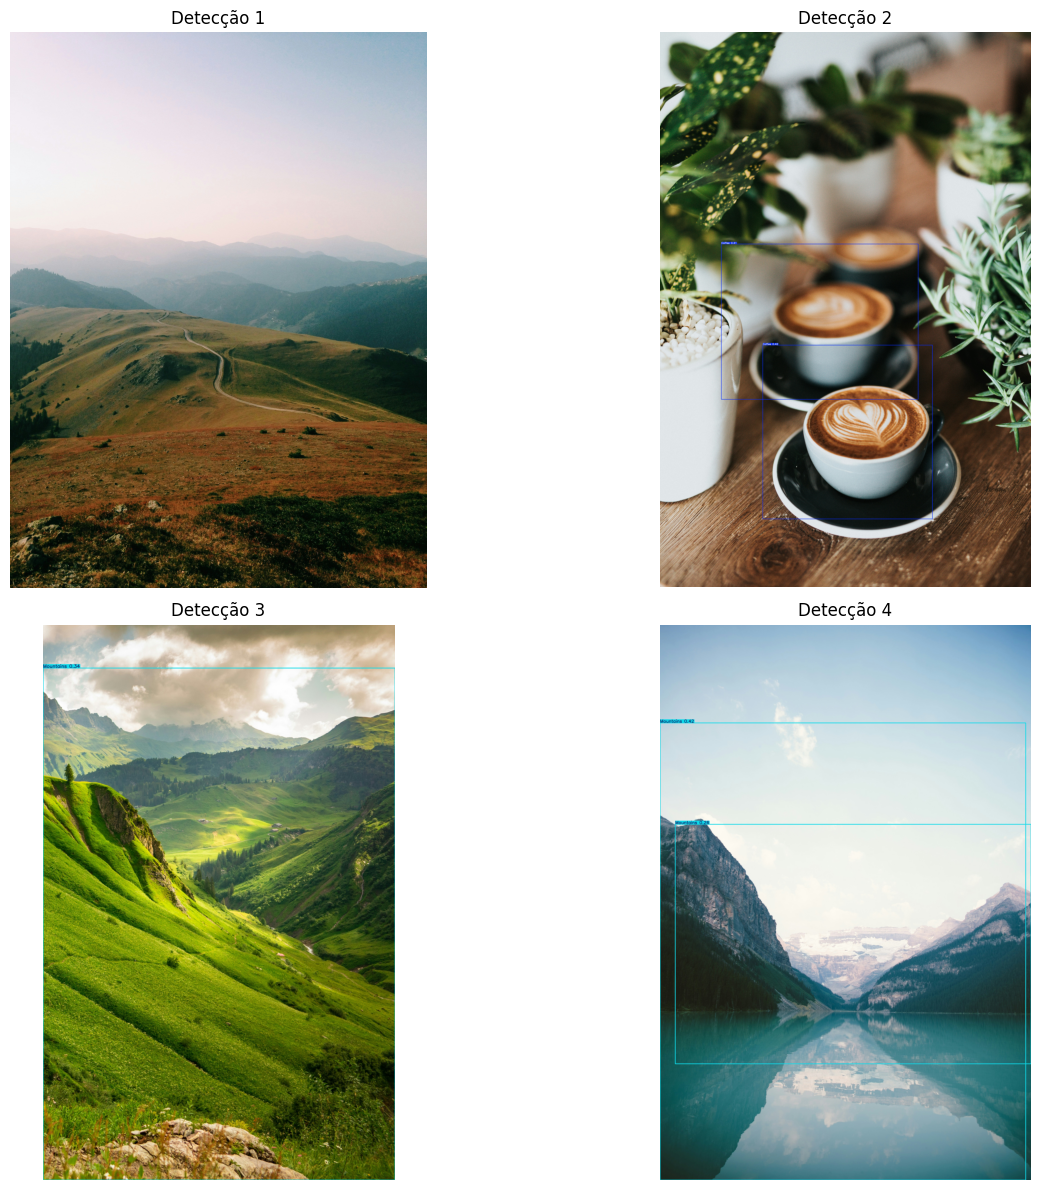


🎯 RESULTADOS DO MODELO - 60 ÉPOCAS
--------------------------------------------------


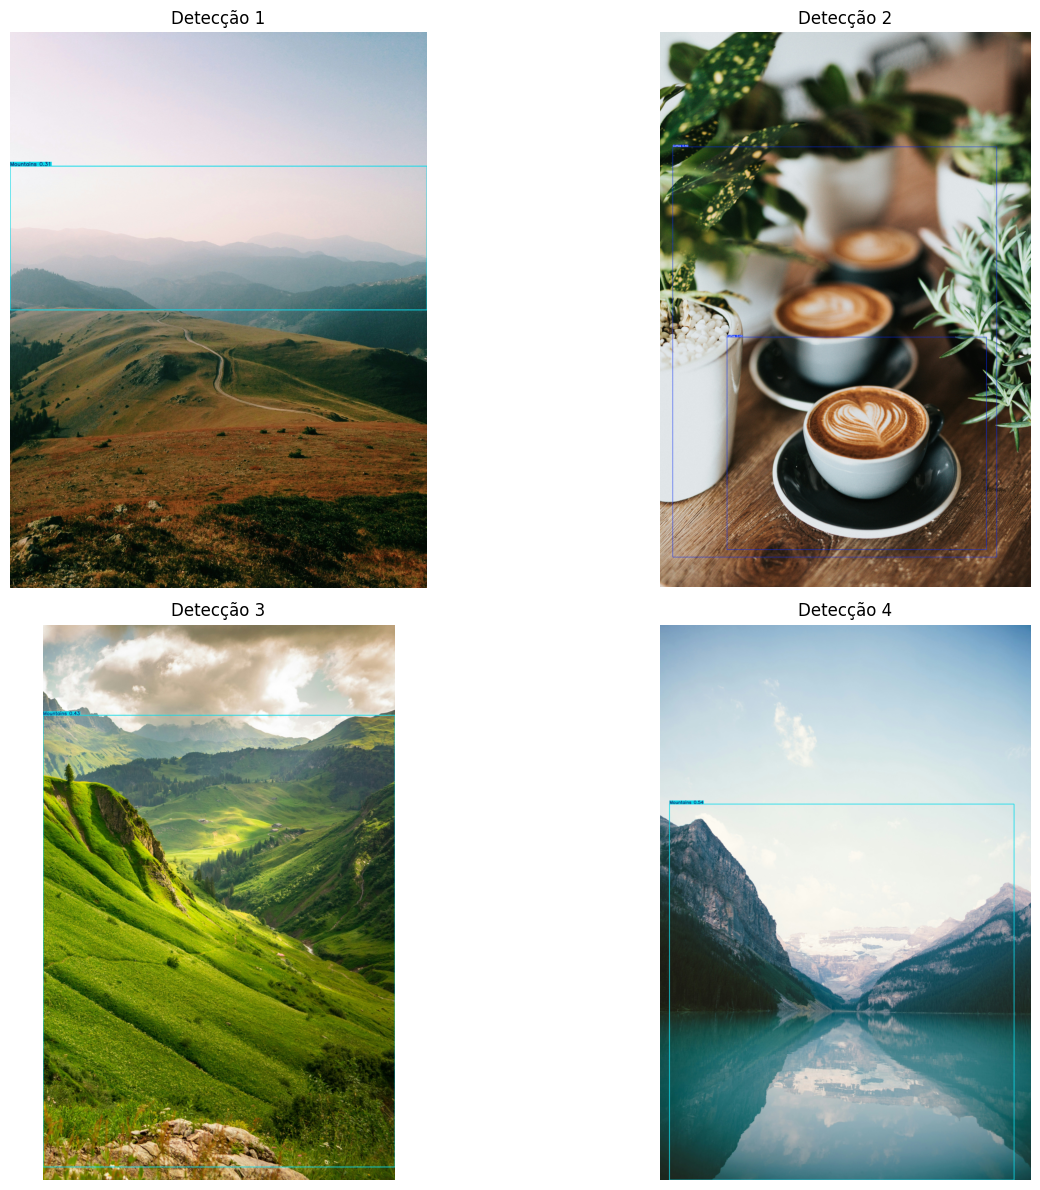

In [21]:
import glob

def mostrar_resultados_teste(pasta_resultados, titulo, num_imagens=4):
    """Mostra as imagens processadas do teste"""
    imagens = glob.glob(f"{pasta_resultados}/*.jpg") + glob.glob(f"{pasta_resultados}/*.png")

    if len(imagens) == 0:
        print(f"❌ Nenhuma imagem encontrada em {pasta_resultados}")
        return

    num_imagens = min(num_imagens, len(imagens))

    print(f"\n{titulo}")
    print("-" * 50)

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.ravel()

    for i, img_path in enumerate(imagens[:num_imagens]):
        img = Image.open(img_path)
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f"Detecção {i+1}", fontsize=12)

    plt.tight_layout()
    plt.show()

# Resultados de 30 épocas
mostrar_resultados_teste(
    "/content/yolov5/runs/detect/test_30_epochs",
    "🎯 RESULTADOS DO MODELO - 30 ÉPOCAS"
)

# Resultados de 60 épocas
mostrar_resultados_teste(
    "/content/yolov5/runs/detect/test_60_epochs",
    "🎯 RESULTADOS DO MODELO - 60 ÉPOCAS"
)

# ----------------------------------------------------------------------------
# ETAPA 14: CONCLUSÕES E RECOMENDAÇÕES
# ----------------------------------------------------------------------------

## 📝 Etapa 14: Conclusões

### Análise dos Resultados:

#### 1. **Comparação de Acurácia:**
- Compare os valores de mAP@0.5 e mAP@0.5:0.95
- Qual modelo teve melhor desempenho?

#### 2. **Tempo de Treinamento:**
- O modelo de 60 épocas levou aproximadamente o dobro do tempo
- O ganho de acurácia justifica o tempo extra?

#### 3. **Overfitting:**
- Observe se há divergência entre train loss e val loss
- Se val loss aumenta enquanto train loss diminui = overfitting

#### 4. **Recomendações para a FarmTech Solutions:**
- Qual modelo você recomendaria?
- Existem casos onde cada modelo seria mais adequado?

### Próximos Passos:
1. Testar com mais épocas (100, 150)
2. Ajustar hiperparâmetros (learning rate, batch size)
3. Experimentar outros modelos (yolov5m, yolov5l)
4. Aumentar o dataset com data augmentation

In [22]:
print("\n" + "="*60)
print("🎉 ANÁLISE COMPLETA FINALIZADA!")
print("="*60)
print("\n📁 Todos os resultados foram salvos em:")
print(f"   - 30 épocas: {RESULTS_30}")
print(f"   - 60 épocas: {RESULTS_60}")
print("\n💡 Dica: Use esses resultados para criar sua apresentação!")
print("="*60)


🎉 ANÁLISE COMPLETA FINALIZADA!

📁 Todos os resultados foram salvos em:
   - 30 épocas: /content/yolov5/runs/train/exp_30_epochs2
   - 60 épocas: /content/yolov5/runs/train/exp_60_epochs

💡 Dica: Use esses resultados para criar sua apresentação!
